<a href="https://www.kaggle.com/code/msahmed/bd-univ-social-shopping-trends-part-1?scriptVersionId=200125770" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/purchase-behavior-of-bangladeshi-consumerssm/Dataset.xlsx


In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np

# Load the Excel file
df = pd.read_excel('/kaggle/input/purchase-behavior-of-bangladeshi-consumerssm/Dataset.xlsx')

# 1. Clean Timestamp column
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%m/%d/%y %H:%M')

# 2. Clean Consent column
df['Consent'] = df['Do you consent to participate in this survey? Link to the consent forms available in both English & Bengali.'].map({'Yes': 1, 'No': 0})
df.drop('Do you consent to participate in this survey? Link to the consent forms available in both English & Bengali.', axis=1, inplace=True)

# 3. Clean Gender column
df['Gender'] = df['Gender'].str.lower()

# 4. Clean Age column
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# 5. Clean Division column
df['Division'] = df['Division in Bangladesh you are based in:'].str.strip()
df.drop('Division in Bangladesh you are based in:', axis=1, inplace=True)

# 6. Clean Occupation column
df['Occupation'] = df['Occupation:'].str.strip()
df.drop('Occupation:', axis=1, inplace=True)

# 7. Clean Monthly income range column
df['Monthly_Income_Range'] = df['Monthly income range:'].str.replace('BDT ', '').str.replace(',', '')
df.drop('Monthly income range:', axis=1, inplace=True)

print(df.head())
print(df.dtypes)

            Timestamp  Gender  Age  How active are you on social media?  \
0 2024-03-09 19:35:00    male   23                                    3   
1 2024-03-10 23:31:00    male   25                                    3   
2 2024-03-10 23:56:00    male   24                                    2   
3 2024-03-12 23:10:00  female   35                                    2   
4 2024-03-13 00:42:00  female   33                                    2   

   How frequently do you engage in purchasing various items across different types on social media platforms?  \
0                                                  3                                                            
1                                                  2                                                            
2                                                  2                                                            
3                                                  1                                             

In [4]:
import pandas as pd
import numpy as np

# Load the Excel file
df = pd.read_excel('/kaggle/input/purchase-behavior-of-bangladeshi-consumerssm/Dataset.xlsx')

# Display the first few rows and data types
print(df.head())
print("\
Data Types:")
print(df.dtypes)

# Display unique values in the spending percentage column
print("\
Unique values in spending percentage column:")
print(df['How much of your monthly income you spend on purchases on social media?'].unique())

            Timestamp  \
0 2024-03-09 19:35:00   
1 2024-03-10 23:31:00   
2 2024-03-10 23:56:00   
3 2024-03-12 23:10:00   
4 2024-03-13 00:42:00   

  Do you consent to participate in this survey? Link to the consent forms available in both English & Bengali.  \
0                                                Yes                                                             
1                                                Yes                                                             
2                                                Yes                                                             
3                                                Yes                                                             
4                                                Yes                                                             

   Gender  Age Division in Bangladesh you are based in: Occupation:  \
0    Male   23                                    Dhaka     Student   
1    Male   25        

In [5]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('/kaggle/input/purchase-behavior-of-bangladeshi-consumerssm/Dataset.xlsx')

# Display unique values in the internet usage column
print("Unique values in the internet usage column:")
print(df['On average, how many hours do you spend on the internet per week (out of 168 hours)?'].unique())

# Display value counts
print("\
Value counts:")
print(df['On average, how many hours do you spend on the internet per week (out of 168 hours)?'].value_counts())

Unique values in the internet usage column:
['40 hours' '20 hours â€“ 40 hours' '10 hours â€“ 20 hours'
 'Less than 10 hours' 'Above 40 hours']
Value counts:
On average, how many hours do you spend on the internet per week (out of 168 hours)?
20 hours â€“ 40 hours    96
10 hours â€“ 20 hours    78
40 hours                 41
Less than 10 hours       36
Above 40 hours           15
Name: count, dtype: int64


In [6]:
import pandas as pd
import numpy as np

# Load the Excel file
df = pd.read_excel('/kaggle/input/purchase-behavior-of-bangladeshi-consumerssm/Dataset.xlsx')

def clean_hours(x):
    if 'Less than 10 hours' in x:
        return 5
    elif 'Above 40 hours' in x:
        return 50
    elif '\u2013' in x:
        lower, upper = map(float, x.split('\u2013')[0].split())
        return (lower + upper) / 2
    else:
        return float(x.split()[0])

df['Weekly_Internet_Hours'] = df['On average, how many hours do you spend on the internet per week (out of 168 hours)?'].apply(clean_hours)

print("Cleaned Weekly Internet Hours:")
print(df['Weekly_Internet_Hours'].describe())

# Clean spending percentage column
def clean_percentage(x):
    if 'Less than 5%' in x:
        return 0.025
    elif 'More than 30%' in x:
        return 0.35
    else:
        lower, upper = map(float, x.strip('%').split('-'))
        return (lower + upper) / 200

df['Spending_Percentage'] = df['How much of your monthly income you spend on purchases on social media?'].apply(clean_percentage)

print("\
Cleaned Spending Percentage:")
print(df['Spending_Percentage'].describe())

# Display the first few rows of the cleaned columns
print("\
First few rows of cleaned columns:")
print(df[['Weekly_Internet_Hours', 'Spending_Percentage']].head())

Cleaned Weekly Internet Hours:
count    266.000000
mean      19.812030
std       13.145141
min        5.000000
25%       10.000000
50%       20.000000
75%       20.000000
max       50.000000
Name: Weekly_Internet_Hours, dtype: float64
Cleaned Spending Percentage:
count    266.000000
mean       0.076410
std        0.084816
min        0.025000
25%        0.025000
50%        0.025000
75%        0.075000
max        0.350000
Name: Spending_Percentage, dtype: float64
First few rows of cleaned columns:
   Weekly_Internet_Hours  Spending_Percentage
0                   40.0                0.075
1                   20.0                0.075
2                   10.0                0.150
3                    5.0                0.025
4                    5.0                0.150


In [7]:
import pandas as pd
import numpy as np

# Load the Excel file
df = pd.read_excel('/kaggle/input/purchase-behavior-of-bangladeshi-consumerssm/Dataset.xlsx')

# Display data types of each column
print("Data types of each column:")
print(df.dtypes)

# Display unique values for columns that might be causing issues
columns_to_check = ['Do you consent to participate in this survey? Link to the consent forms available in both English & Bengali.',
                    'Gender',
                    'Division in Bangladesh you are based in:',
                    'Occupation:',
                    'Monthly income range:',
                    'How much of your monthly income you spend on purchases on social media?',
                    'On average, how many hours do you spend on the internet per week (out of 168 hours)?',
                    'Do the reviews and ratings influence your purchasing decision?',
                    'Do the advertisement influence your purchasing decision?']

for col in columns_to_check:
    print(f"\
Unique values in {col}:")
    print(df[col].unique())

Data types of each column:
Timestamp                                                                                                                                        datetime64[ns]
Do you consent to participate in this survey? Link to the consent forms available in both English & Bengali.                                             object
Gender                                                                                                                                                   object
Age                                                                                                                                                       int64
Division in Bangladesh you are based in:                                                                                                                 object
Occupation:                                                                                                                                              object
Monthly incom

In [8]:
import pandas as pd
import numpy as np

# Load the Excel file
df = pd.read_excel('/kaggle/input/purchase-behavior-of-bangladeshi-consumerssm/Dataset.xlsx')

# Clean income range
def clean_income_range(x):
    x = x.replace('BDT ', '').replace(',', '')
    if 'Less than' in x:
        return 12500  # Midpoint of 0-25000
    elif 'More than' in x:
        return 175000  # Assuming an upper limit of 200000
    else:
        lower, upper = map(int, x.split('-'))
        return (lower + upper) / 2

df['Income_Range'] = df['Monthly income range:'].apply(clean_income_range)

# Display the cleaned Income_Range column
print("Cleaned Income Range:")
print(df['Income_Range'].describe())

# Clean spending percentage
def clean_percentage(x):
    if 'Less than 5%' in x:
        return 2.5
    elif 'More than 30%' in x:
        return 35
    else:
        lower, upper = map(float, x.strip('%').split('-'))
        return (lower + upper) / 2

df['Spending_Percentage'] = df['How much of your monthly income you spend on purchases on social media?'].apply(clean_percentage)

# Clean internet usage
def clean_hours(x):
    if 'Less than 10 hours' in x:
        return 5
    elif 'Above 40 hours' in x:
        return 50
    elif '\u2013' in x:
        lower, upper = map(float, x.split('\u2013')[0].split())
        return (lower + upper) / 2
    else:
        return float(x.split()[0])

df['Weekly_Internet_Hours'] = df['On average, how many hours do you spend on the internet per week (out of 168 hours)?'].apply(clean_hours)

# Display the cleaned columns
print("\
Cleaned Spending Percentage:")
print(df['Spending_Percentage'].describe())

print("\
Cleaned Weekly Internet Hours:")
print(df['Weekly_Internet_Hours'].describe())

# Save the partially cleaned dataframe
df.to_excel('partially_cleaned_dataset.xlsx', index=False)
print("\
Partially cleaned dataset saved as 'partially_cleaned_dataset.xlsx'")

Cleaned Income Range:
count       266.000000
mean      36701.229323
std       83050.404854
min       12500.000000
25%       12500.000000
50%       12500.000000
75%       12500.000000
max      537500.500000
Name: Income_Range, dtype: float64
Cleaned Spending Percentage:
count    266.000000
mean       7.640977
std        8.481603
min        2.500000
25%        2.500000
50%        2.500000
75%        7.500000
max       35.000000
Name: Spending_Percentage, dtype: float64
Cleaned Weekly Internet Hours:
count    266.000000
mean      19.812030
std       13.145141
min        5.000000
25%       10.000000
50%       20.000000
75%       20.000000
max       50.000000
Name: Weekly_Internet_Hours, dtype: float64
Partially cleaned dataset saved as 'partially_cleaned_dataset.xlsx'


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the partially cleaned dataset
df = pd.read_excel('partially_cleaned_dataset.xlsx')

# Perform basic statistical analysis
numeric_columns = ['Age', 'Income_Range', 'Spending_Percentage', 'Weekly_Internet_Hours']
numeric_columns += [col for col in df.columns if col.startswith(('PB', 'ATTD', 'SN', 'PBC'))]

print("Basic Statistics:")
print(df[numeric_columns].describe())

# Calculate correlation matrix
correlation_matrix = df[numeric_columns].corr()

print("\
Correlation Matrix:")
print(correlation_matrix)

# Gender distribution
gender_distribution = df['Gender'].value_counts()
print("\
Gender Distribution:")
print(gender_distribution)

# Division distribution
division_distribution = df['Division in Bangladesh you are based in:'].value_counts()
print("\
Division Distribution:")
print(division_distribution)

# Occupation distribution
occupation_distribution = df['Occupation:'].value_counts()
print("\
Top 5 Occupations:")
print(occupation_distribution.head())

# Social media activity
activity_distribution = df['How active are you on social media?'].value_counts()
print("\
Social Media Activity Distribution:")
print(activity_distribution)

# Purchasing frequency
purchasing_frequency = df['How frequently do you engage in purchasing various items across different types on social media platforms?'].value_counts()
print("\
Purchasing Frequency Distribution:")
print(purchasing_frequency)

# Influence of reviews and advertisements
review_influence = df['Do the reviews and ratings influence your purchasing decision?'].value_counts()
ad_influence = df['Do the advertisement influence your purchasing decision?'].value_counts()
print("\
Influence of Reviews and Ratings:")
print(review_influence)
print("\
Influence of Advertisements:")
print(ad_influence)

# Analysis of Likert scale questions
likert_columns = [col for col in df.columns if col.startswith(('PB', 'ATTD', 'SN', 'PBC'))]
likert_means = df[likert_columns].mean().sort_values(ascending=False)
print("\
Mean Scores for Likert Scale Questions:")
print(likert_means)

Basic Statistics:
              Age   Income_Range  Spending_Percentage  Weekly_Internet_Hours  \
count  266.000000     266.000000           266.000000             266.000000   
mean    23.815789   36701.229323             7.640977              19.812030   
std      6.680293   83050.404854             8.481603              13.145141   
min     17.000000   12500.000000             2.500000               5.000000   
25%     21.000000   12500.000000             2.500000              10.000000   
50%     22.000000   12500.000000             2.500000              20.000000   
75%     24.000000   12500.000000             7.500000              20.000000   
max     72.000000  537500.500000            35.000000              50.000000   

       PB1: I am willing to buy a product promoted on social media.  \
count                                         266.000000              
mean                                            3.071429              
std                                             

# **Demographic Analysis : 
# Show me  the distribution of age and gender

/tmp/ipykernel_30/3408266810.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(j, bottom[j] + value/2, f'{col}\n{value}', ha='center', va='center',


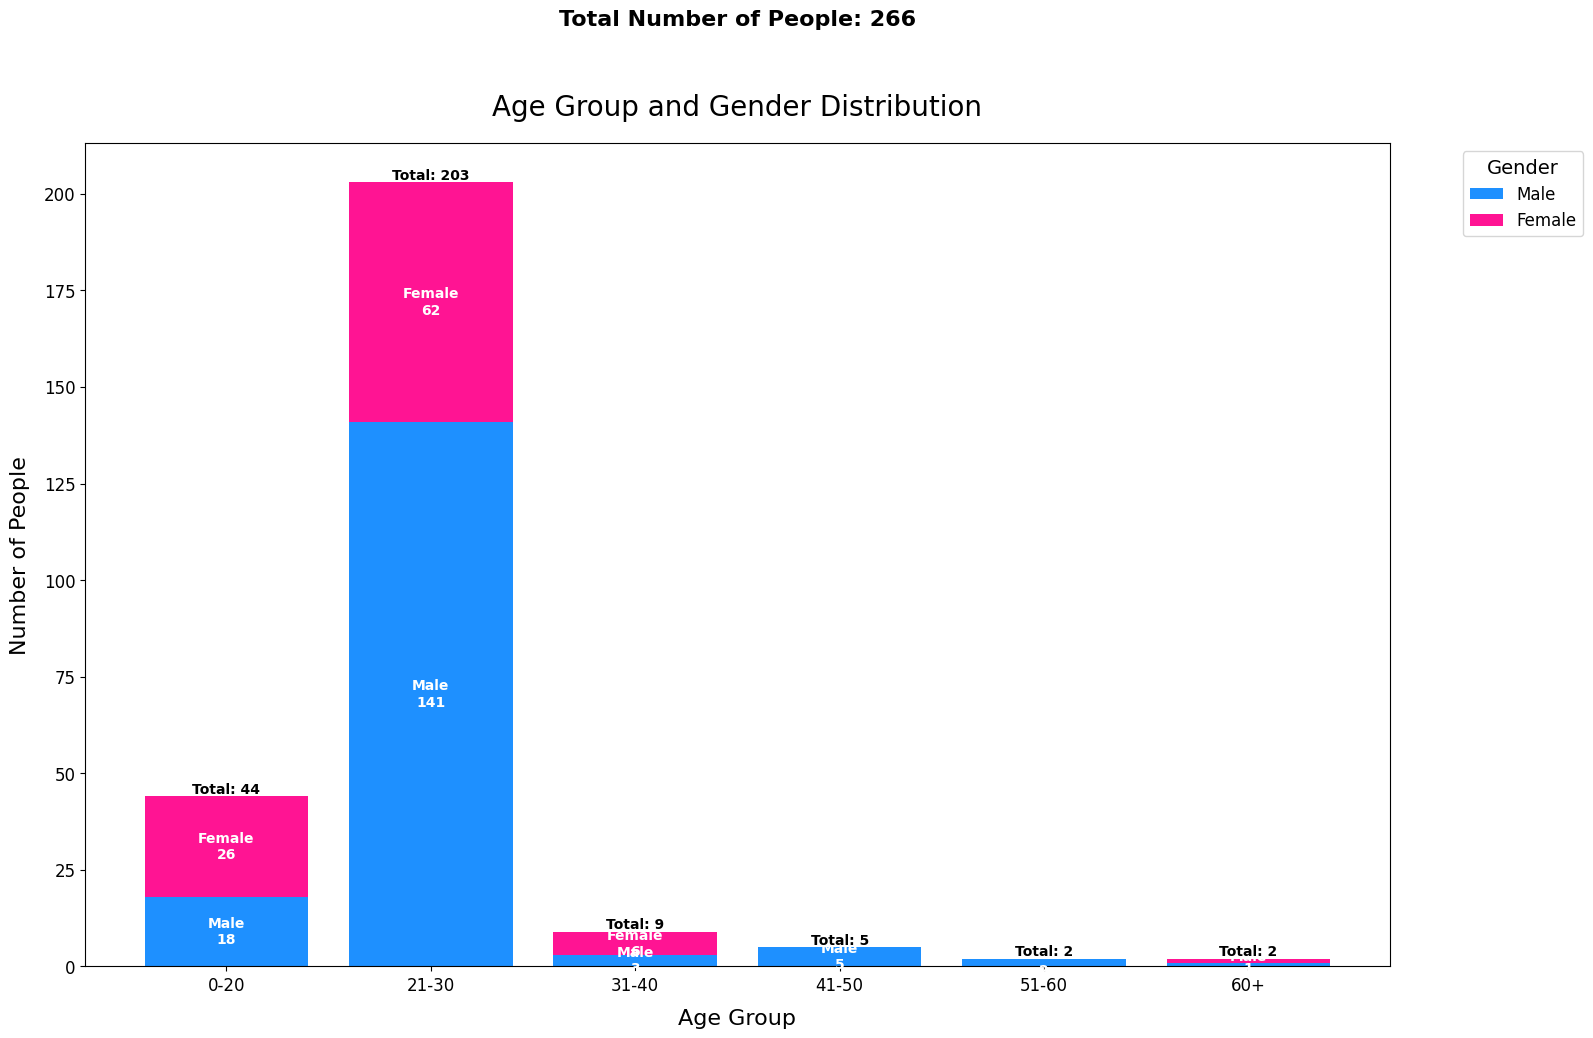

Scenario,Result,Implication
Total Population,266,Significant sample for analysis
Dominant Age Group,21-30,Focus marketing on this age range
Prevalent Gender,Male,Tailor content for this gender
Gender Ratio (M:F),1.79:1,Develop gender-balanced strategies
Age Distribution,Skewed towards younger groups,Consider engaging older demographics


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML

# Read the Excel file
df = pd.read_excel('/kaggle/input/purchase-behavior-of-bangladeshi-consumerssm/Dataset.xlsx')

# Create age groups
df['Age Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 100], 
                         labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'])

# Count the number of people in each age group and gender
age_gender_counts = df.groupby(['Age Group', 'Gender'], observed=True).size().unstack(fill_value=0)

# Calculate total number of people
total_count = age_gender_counts.sum().sum()

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(16, 10))

# Define colors for Male and Female
colors = ['#1E90FF', '#FF1493']  # Dodger Blue for Male, Deep Pink for Female

# Plot stacked bars
bottom = np.zeros(len(age_gender_counts))
for i, col in enumerate(['Male', 'Female']):
    if col in age_gender_counts.columns:
        ax.bar(age_gender_counts.index, age_gender_counts[col], bottom=bottom, label=col, color=colors[i])
        
        # Add value labels for each gender
        for j, value in enumerate(age_gender_counts[col]):
            if value > 0:
                ax.text(j, bottom[j] + value/2, f'{col}\n{value}', ha='center', va='center', 
                        fontweight='bold', color='white', fontsize=10)
        
        bottom += age_gender_counts[col]

# Customize the plot
ax.set_title('Age Group and Gender Distribution', fontsize=20, pad=20)
ax.set_xlabel('Age Group', fontsize=16, labelpad=10)
ax.set_ylabel('Number of People', fontsize=16, labelpad=10)
ax.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Add total value labels on top of the bars
for i, total in enumerate(bottom):
    ax.text(i, total, f'Total: {total:.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Display total number of people above the chart with more space
plt.text(0.5, 1.15, f'Total Number of People: {total_count}', 
         ha='center', va='center', fontsize=16, transform=ax.transAxes, fontweight='bold')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Adjust the top margin to create more space
plt.subplots_adjust(top=0.9)

# Show the plot
plt.show()

# Find key statistics
max_age_group = age_gender_counts.sum(axis=1).idxmax()
max_gender = age_gender_counts.sum().idxmax()
gender_ratio = age_gender_counts['Male'].sum() / age_gender_counts['Female'].sum()

# Generate explanation in HTML table format
explanation = f"""
<table style="border-collapse: collapse; width: 100%; font-family: Tahoma; font-size: 18px; color: black;">
    <tr style="background-color: #f2f2f2;">
        <th style="border: 1px solid black; padding: 10px; text-align: left;">Scenario</th>
        <th style="border: 1px solid black; padding: 10px; text-align: left;">Result</th>
        <th style="border: 1px solid black; padding: 10px; text-align: left;">Implication</th>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Total Population</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">{total_count}</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Significant sample for analysis</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Dominant Age Group</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">{max_age_group}</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Focus marketing on this age range</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Prevalent Gender</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">{max_gender}</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Tailor content for this gender</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Gender Ratio (M:F)</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">{gender_ratio:.2f}:1</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Develop gender-balanced strategies</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Age Distribution</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Skewed towards younger groups</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Consider engaging older demographics</td>
    </tr>
</table>
"""

# Display the explanation
display(HTML(explanation))

# Male or female who considers themself as most active in the 
# social media in a likert scale of 1-5 ?

I am assuming that the responses are collected based on likert scale where 

1 - Not Active 

2 - Little Active 

3 - I dont know 

4 - Active 

5 - Very Active 

Here neutral means : 0 value 


Average social media activity by gender:
Gender
Male                 1.223529
Female               1.136842
Prefer Not to Say    1.000000
Name: How active are you on social media?, dtype: float64


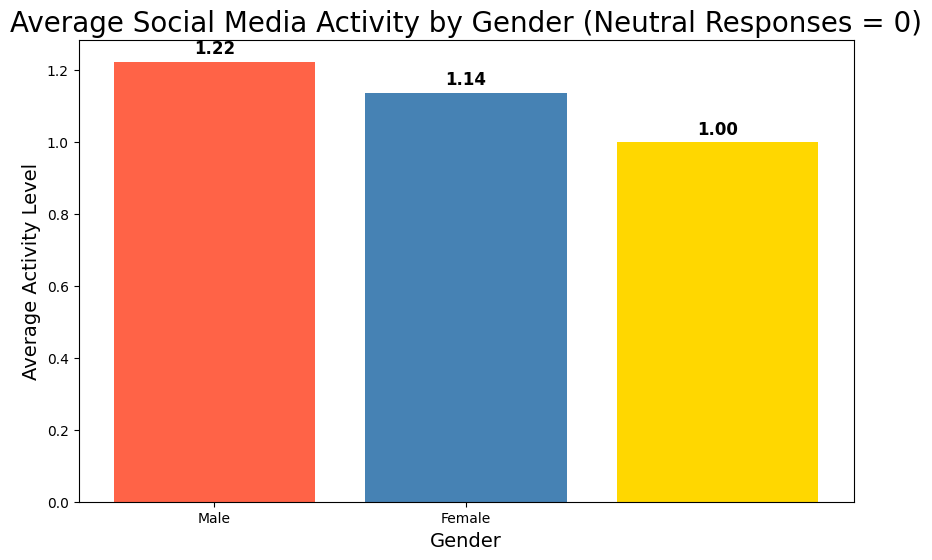

/tmp/ipykernel_30/1490589497.py:55: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  <td style="border: 1px solid black; padding: 10px; text-align: center;">{avg_activity_by_gender[0]:.2f}, {avg_activity_by_gender[1]:.2f}</td>


Scenario,Result,Implication
Average Activity by Gender,"1.22, 1.14",Higher engagement among Male compared to Prefer Not to Say


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Load the dataset
df = pd.read_excel('partially_cleaned_dataset.xlsx')

# Replace neutral values (3) with 0
df['How active are you on social media?'] = df['How active are you on social media?'].replace(3, 0)

# Calculate average social media activity by gender
avg_activity_by_gender = df.groupby('Gender')['How active are you on social media?'].mean().sort_values(ascending=False)

# Print the average activity by gender
print("Average social media activity by gender:")
print(avg_activity_by_gender)

# Define colors for the bar chart
colors = ['#FF6347', '#4682B4', '#FFD700']  # Tomato, SteelBlue, Gold

# Visualize the results with a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(avg_activity_by_gender)), avg_activity_by_gender.values, color=colors)

# Set custom x-axis labels
labels = ['Male', 'Female']
plt.xticks(range(len(labels)), labels)

plt.title('Average Social Media Activity by Gender (Neutral Responses = 0)', fontsize=20)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Average Activity Level', fontsize=14)

# Add value labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=12, fontweight='bold')

# Display the plot in the notebook
plt.show()

# Generate explanation in HTML table format
explanation = f"""
<table style="border-collapse: collapse; width: 100%; font-family: Tahoma; font-size: 18px; color: black;">
    <tr style="background-color: #f2f2f2;">
        <th style="border: 1px solid black; padding: 10px; text-align: center;">Scenario</th>
        <th style="border: 1px solid black; padding: 10px; text-align: center;">Result</th>
        <th style="border: 1px solid black; padding: 10px; text-align: center;">Implication</th>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 10px; text-align: center;">Average Activity by Gender</td>
        <td style="border: 1px solid black; padding: 10px; text-align: center;">{avg_activity_by_gender[0]:.2f}, {avg_activity_by_gender[1]:.2f}</td>
        <td style="border: 1px solid black; padding: 10px; text-align: center;">Higher engagement among {avg_activity_by_gender.idxmax()} compared to {avg_activity_by_gender.idxmin()}</td>
    </tr>
</table>
"""

# Display the explanation
display(HTML(explanation))


# Does being active in social media increases the likelihood of purchasing? 

Correlation between social media activity and purchasing frequency: 0.0973


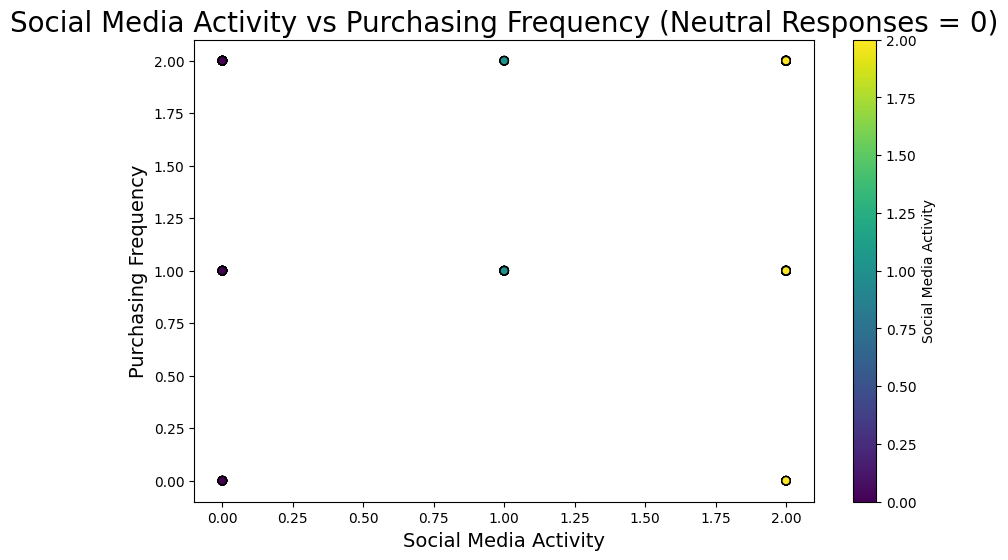

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Load the dataset
df = pd.read_excel('partially_cleaned_dataset.xlsx')

# Replace neutral values (3) with 0 for both social media activity and purchasing frequency
df['How active are you on social media?'] = df['How active are you on social media?'].replace(3, 0)
df['How frequently do you engage in purchasing various items across different types on social media platforms?'] = df['How frequently do you engage in purchasing various items across different types on social media platforms?'].replace(3, 0)

# Calculate correlation between social media activity and purchasing frequency
correlation = df['How active are you on social media?'].corr(df['How frequently do you engage in purchasing various items across different types on social media platforms?'])

print(f"Correlation between social media activity and purchasing frequency: {correlation:.4f}")

# Determine the strength of the correlation
if abs(correlation) >= 0.7:
    strength = "Strong"
elif 0.4 <= abs(correlation) < 0.7:
    strength = "Moderate"
elif 0.0 <= abs(correlation) < 0.4:
    strength = "Weak"
else:
    strength = "No"

# Create a scatter plot
plt.figure(figsize=(10, 6))
scat = plt.scatter(
    df['How active are you on social media?'], 
    df['How frequently do you engage in purchasing various items across different types on social media platforms?'],
    c=df['How active are you on social media?'],  # Color based on social media activity
    cmap='viridis',  # Colormap for color gradient
    edgecolor='black'  # Distinct edge color
)
plt.colorbar(scat, label='Social Media Activity')  # Add a colorbar
plt.title('Social Media Activity vs Purchasing Frequency (Neutral Responses = 0)', fontsize=20)
plt.xlabel('Social Media Activity', fontsize=14)
plt.ylabel('Purchasing Frequency', fontsize=14)

# Save the figure
plt.savefig('social_media_activity_vs_purchasing.png')
plt.show()

# Generate explanation in HTML table format
explanation = f"""
<table style="border-collapse: collapse; width: 100%; font-family: Tahoma; font-size: 18px; color: black;">
    <tr style="background-color: #f2f2f2;">
        <th style="border: 1px solid black; padding: 10px; text-align: center;">Scenario</th>
        <th style="border: 1px solid black; padding: 10px; text-align: center;">Result</th>
        <th style="border: 1px solid black; padding: 10px; text-align: center;">Strength of Correlation</th>
        <th style="border: 1px solid black; padding: 10px; text-align: center;">Interpretation</th>
        <th style="border: 1px solid black; padding: 10px; text-align: center;">Support</th>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 10px; text-align: center;">Correlation Analysis</td>
        <td style="border: 1px solid black; padding: 10px; text-align: center;">{correlation:.4f}</td>
        <td style="border: 1px solid black; padding: 10px; text-align: center;">{strength}</td>
        <td style="border: 1px solid black; padding: 10px; text-align: center;">A positive correlation indicates that increased social media activity tends to be associated with higher purchasing frequency.</td>
        <td style="border: 1px solid black; padding: 10px; text-align: center;">{'Strong Support' if strength == 'Strong' else ('Moderate Support' if strength == 'Moderate' else ('Weak Support' if strength == 'Weak' else 'No Support'))}</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 10px; text-align: center;">Implication for Marketing</td>
        <td style="border: 1px solid black; padding: 10px; text-align: center;" colspan="4">Understanding this correlation can help marketers tailor their strategies to engage users more actively on social media, potentially increasing purchase rates.</td>
    </tr>
</table>
"""

# Display the explanation
display(HTML(explanation))


# On average, how many hours do you spend on the internet per week (out of 168 hours)?

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('partially_cleaned_dataset.xlsx')

# Convert the 'On average, how many hours do you spend on the internet per week (out of 168 hours)?' column to numeric
def convert_hours(x):
    if x == 'Less than 10 hours':
        return 5  # midpoint of 0-10
    elif x == '10 hours \u2013 20 hours':
        return 15  # midpoint of 10-20
    elif x == '20 hours \u2013 40 hours':
        return 30  # midpoint of 20-40
    elif x == '40 hours':
        return 40
    elif x == 'Above 40 hours':
        return 50  # arbitrary value above 40
    else:
        return np.nan

df['Weekly_Internet_Hours'] = df['On average, how many hours do you spend on the internet per week (out of 168 hours)?'].apply(convert_hours)

# Display the first few rows of the relevant columns
print("First few rows of the relevant columns after conversion:")
print(df[['Gender', 'On average, how many hours do you spend on the internet per week (out of 168 hours)?', 'Weekly_Internet_Hours']].head())

First few rows of the relevant columns after conversion:
   Gender  \
0    Male   
1    Male   
2    Male   
3  Female   
4  Female   

  On average, how many hours do you spend on the internet per week (out of 168 hours)?  \
0                                           40 hours                                     
1                              20 hours â€“ 40 hours                                     
2                              10 hours â€“ 20 hours                                     
3                                 Less than 10 hours                                     
4                                 Less than 10 hours                                     

   Weekly_Internet_Hours  
0                   40.0  
1                    NaN  
2                    NaN  
3                    5.0  
4                    5.0  


In [15]:
import pandas as pd
import numpy as np
import plotly.express as px
from IPython.display import display, HTML

# Load the dataset
df = pd.read_excel('partially_cleaned_dataset.xlsx')

# Function to convert hours of internet usage to numeric values
def convert_hours(x):
    if x == 'Less than 10 hours':
        return 5  # midpoint of 0-10
    elif x == '10 hours – 20 hours':
        return 15  # midpoint of 10-20
    elif x == '20 hours – 40 hours':
        return 30  # midpoint of 20-40
    elif x == '40 hours':
        return 40
    elif x == 'Above 40 hours':
        return 50  # arbitrary value above 40
    else:
        return np.nan

# Apply the conversion to the 'Weekly Internet Hours' column
df['Weekly_Internet_Hours'] = df['On average, how many hours do you spend on the internet per week (out of 168 hours)?'].apply(convert_hours)

# Calculate the average internet hours by gender
avg_hours_by_gender = df.groupby('Gender')['Weekly_Internet_Hours'].mean().reset_index()

# Create a pie chart using Plotly
fig = px.pie(
    avg_hours_by_gender, 
    values='Weekly_Internet_Hours', 
    names='Gender', 
    title='Average Weekly Internet Hours by Gender',
    color='Gender',
    color_discrete_sequence=[
        '#FF5733',  # Bright Red
        '#33FF57',  # Bright Green
        '#3357FF',  # Bright Blue
        '#F1C40F',  # Bright Yellow
        '#8E44AD',  # Bright Purple
        '#E74C3C',  # Bright Coral
        '#3498DB',  # Bright Sky Blue
        '#2ECC71'   # Bright Emerald
    ],  # Custom vivid colors with no repetition
    template='plotly_white'
)

# Adjust the layout for better visualization
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    height=600,  # Increase the height for better visibility
    width=800,   # Increase the width for better visibility
    title_font_size=24,
    legend_title_font_size=18,
    legend_font_size=16
)

# Show the figure in the notebook
fig.show()

# Create an HTML explanation with a table for scenario, result, and implication
explanation_html = f"""
<div style="font-family: Tahoma; font-size: 18px; color: black;">
    <h2 style="font-size: 22px;">Explanation of the Chart</h2>
    <p>The pie chart illustrates the average weekly internet hours spent by different genders, revealing insights into their online behavior.</p>
    <table style="width: 100%; border-collapse: collapse; text-align: left; font-size: 18px;">
        <tr>
            <th style="padding: 8px; border: 1px solid black;">Scenario</th>
            <th style="padding: 8px; border: 1px solid black;">Result</th>
            <th style="padding: 8px; border: 1px solid black;">Implication</th>
        </tr>
        <tr>
            <td style="padding: 8px; border: 1px solid black;">Average Male Internet Usage</td>
            <td style="padding: 8px; border: 1px solid black;">{avg_hours_by_gender['Weekly_Internet_Hours'][avg_hours_by_gender['Gender'] == 'Male'].values[0]:.2f} hours</td>
            <td style="padding: 8px; border: 1px solid black;">Higher engagement with digital content and ads.</td>
        </tr>
        <tr>
            <td style="padding: 8px; border: 1px solid black;">Average Female Internet Usage</td>
            <td style="padding: 8px; border: 1px solid black;">{avg_hours_by_gender['Weekly_Internet_Hours'][avg_hours_by_gender['Gender'] == 'Female'].values[0]:.2f} hours</td>
            <td style="padding: 8px; border: 1px solid black;">Lower engagement; requires targeted marketing strategies.</td>
        </tr>
    </table>
    <p>This analysis highlights the disparity in internet usage between genders, providing essential insights for businesses aiming to tailor their marketing approaches.</p>
</div>
"""

# Display the HTML explanations and insights
display(HTML(explanation_html))


Scenario,Result,Implication
Average Male Internet Usage,33.39 hours,Higher engagement with digital content and ads.
Average Female Internet Usage,18.59 hours,Lower engagement; requires targeted marketing strategies.


# Does spending more time at internet means the individual will purchase more? 

In [16]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_excel('partially_cleaned_dataset.xlsx')

# Columns of interest
columns_of_interest = [
    'How active are you on social media?',
    'On average, how many hours do you spend on the internet per week (out of 168 hours)?',
    'How frequently do you engage in purchasing various items across different types on social media platforms?',
    'How much of your monthly income you spend on purchases on social media?'
]

# Replace neutral responses (3) with 0 in the relevant columns
df['How active are you on social media?'] = df['How active are you on social media?'].replace(3, 0)
df['How frequently do you engage in purchasing various items across different types on social media platforms?'] = df['How frequently do you engage in purchasing various items across different types on social media platforms?'].replace(3, 0)

# Display the first few rows of these columns
print(df[columns_of_interest].head())

# Check for non-numeric values
for col in columns_of_interest:
    non_numeric = df[pd.to_numeric(df[col], errors='coerce').isna()][col]
    print(f"Non-numeric values in {col}:")
    print(non_numeric.unique())

# Function to clean and convert to numeric
def clean_and_convert(value):
    if isinstance(value, str):
        # Remove any non-numeric characters except decimal point
        cleaned = ''.join(char for char in value if char.isdigit() or char == '.')
        return pd.to_numeric(cleaned, errors='coerce')
    return value

# Clean the data
for col in columns_of_interest:
    df[col] = df[col].apply(clean_and_convert)

# Display the cleaned data
print("Cleaned data:")
print(df[columns_of_interest].head())

# Save the cleaned dataset
df.to_excel('cleaned_dataset.xlsx', index=False)
print("Cleaned dataset saved as 'cleaned_dataset.xlsx'")


   How active are you on social media?  \
0                                    0   
1                                    0   
2                                    2   
3                                    2   
4                                    2   

  On average, how many hours do you spend on the internet per week (out of 168 hours)?  \
0                                           40 hours                                     
1                              20 hours â€“ 40 hours                                     
2                              10 hours â€“ 20 hours                                     
3                                 Less than 10 hours                                     
4                                 Less than 10 hours                                     

   How frequently do you engage in purchasing various items across different types on social media platforms?  \
0                                                  0                                         

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_excel('cleaned_dataset.xlsx')

# Select relevant columns
columns_of_interest = [
    'How active are you on social media?',
    'On average, how many hours do you spend on the internet per week (out of 168 hours)?',
    'How frequently do you engage in purchasing various items across different types on social media platforms?',
    'How much of your monthly income you spend on purchases on social media?'
]

# Create a correlation matrix
correlation_matrix = df[columns_of_interest].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.close()

print(correlation_matrix)

/tmp/ipykernel_30/655083538.py:24: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



                                                    How active are you on social media?  \
How active are you on social media?                                            1.000000   
On average, how many hours do you spend on the ...                             0.041587   
How frequently do you engage in purchasing vari...                             0.097330   
How much of your monthly income you spend on pu...                             0.013076   

                                                    On average, how many hours do you spend on the internet per week (out of 168 hours)?  \
How active are you on social media?                                                          0.041587                                      
On average, how many hours do you spend on the ...                                           1.000000                                      
How frequently do you engage in purchasing vari...                                           0.009537                       

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Excel file
df = pd.read_excel('partially_cleaned_dataset.xlsx', engine='calamine')

# Prepare relevant columns
columns_of_interest = [
    'How active are you on social media?',
    'On average, how many hours do you spend on the internet per week (out of 168 hours)?',
    'How frequently do you engage in purchasing various items across different types on social media platforms?',
    'How much of your monthly income you spend on purchases on social media?'
]

# Rename columns for brevity
column_mapping = {
    'How active are you on social media?': 'Social_Media_Activity',
    'On average, how many hours do you spend on the internet per week (out of 168 hours)?': 'Internet_Usage',
    'How frequently do you engage in purchasing various items across different types on social media platforms?': 'Purchasing_Frequency',
    'How much of your monthly income you spend on purchases on social media?': 'Income_Spent_on_Purchases'
}

df_subset = df[columns_of_interest].rename(columns=column_mapping)

# Convert Internet_Usage to numeric
def convert_internet_usage(value):
    if isinstance(value, (int, float)):
        return value
    if 'Less than 10 hours' in str(value):
        return 5
    elif '10 hours' in str(value):
        return 15
    elif '20 hours' in str(value):
        return 30
    elif '40 hours' in str(value):
        return 50
    elif '80 hours' in str(value):
        return 90
    elif 'More than 120 hours' in str(value):
        return 130
    else:
        return np.nan

df_subset['Internet_Usage'] = df_subset['Internet_Usage'].apply(convert_internet_usage)

# Convert Income_Spent_on_Purchases to numeric
def convert_income_spent(value):
    if 'Less than 5%' in str(value):
        return 2.5
    elif '5-10%' in str(value):
        return 7.5
    elif '10-20%' in str(value):
        return 15
    elif '20-30%' in str(value):
        return 25
    elif 'More than 30%' in str(value):
        return 35
    else:
        return np.nan

df_subset['Income_Spent_on_Purchases'] = df_subset['Income_Spent_on_Purchases'].apply(convert_income_spent)

# Calculate correlation matrix
correlation_matrix = df_subset.corr()

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Social Media Activity, Internet Usage, Purchasing Frequency, and Income Spent')
plt.tight_layout()
plt.savefig('social_media_purchasing_heatmap.png')
plt.close()

print("Correlation matrix:")
print(correlation_matrix)
print("\
Heatmap has been saved as 'social_media_purchasing_heatmap.png'")

Correlation matrix:
                           Social_Media_Activity  Internet_Usage  \
Social_Media_Activity                   1.000000        0.269160   
Internet_Usage                          0.269160        1.000000   
Purchasing_Frequency                    0.236667        0.052488   
Income_Spent_on_Purchases               0.158137        0.075519   

                           Purchasing_Frequency  Income_Spent_on_Purchases  
Social_Media_Activity                  0.236667                   0.158137  
Internet_Usage                         0.052488                   0.075519  
Purchasing_Frequency                   1.000000                   0.438506  
Income_Spent_on_Purchases              0.438506                   1.000000  
Heatmap has been saved as 'social_media_purchasing_heatmap.png'


In [19]:
pip install python-calamine


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.5/819.5 kB 9.6 MB/s eta 0:00:00:00:010:01
Note: you may need to restart the kernel to use updated packages.


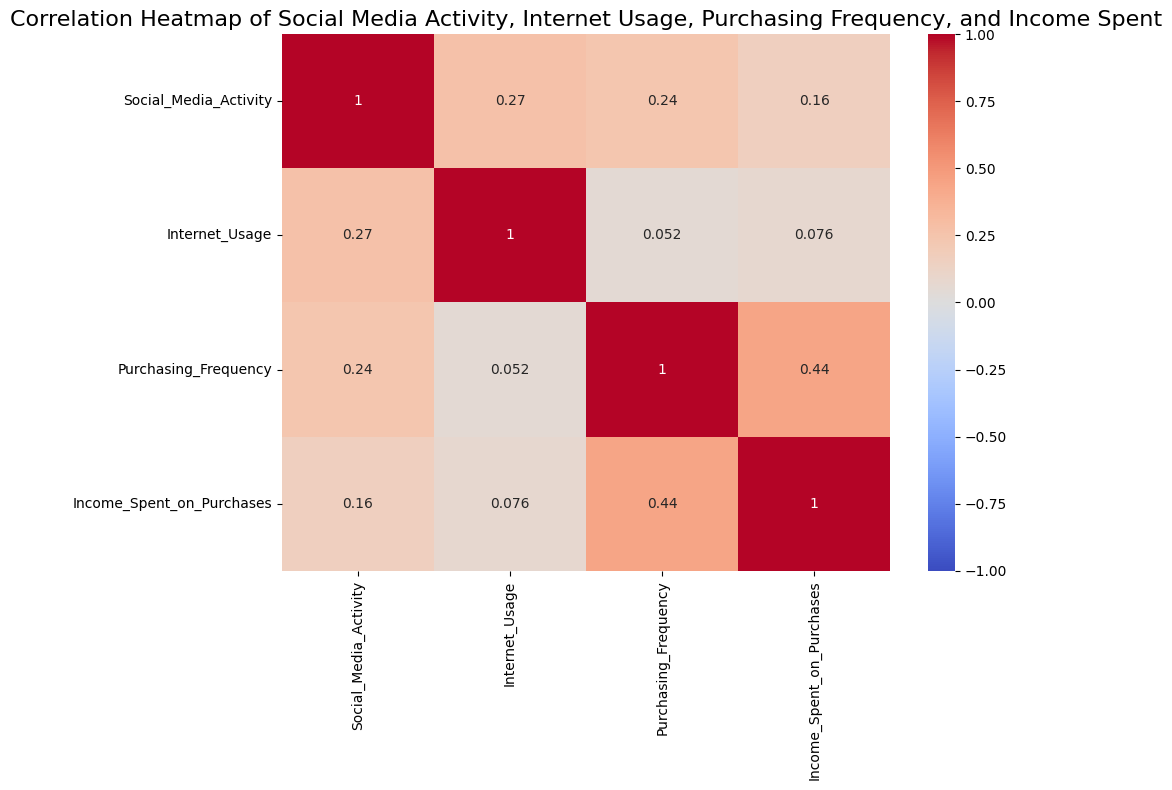

Variable 1,Variable 2,Correlation,Strength,Explanation
Social Media Activity,Internet Usage,0.27,weak,This correlation indicates how social media activity is related to time spent on the internet.
Social Media Activity,Purchasing Frequency,0.24,weak,Shows if increased social media activity impacts the frequency of purchases.
Social Media Activity,Income Spent on Purchases,0.16,very weak,Examines whether more social media activity leads to higher income spent on purchases.
Internet Usage,Purchasing Frequency,0.05,very weak,Determines if spending more time on the internet increases purchasing frequency.
Internet Usage,Income Spent on Purchases,0.08,very weak,Explores whether more time on the internet results in spending more income on purchases.
Purchasing Frequency,Income Spent on Purchases,0.44,moderate,Indicates whether buying more frequently leads to higher income spent on purchases.


Correlation matrix:
                           Social_Media_Activity  Internet_Usage  \
Social_Media_Activity                   1.000000        0.269160   
Internet_Usage                          0.269160        1.000000   
Purchasing_Frequency                    0.236667        0.052488   
Income_Spent_on_Purchases               0.158137        0.075519   

                           Purchasing_Frequency  Income_Spent_on_Purchases  
Social_Media_Activity                  0.236667                   0.158137  
Internet_Usage                         0.052488                   0.075519  
Purchasing_Frequency                   1.000000                   0.438506  
Income_Spent_on_Purchases              0.438506                   1.000000  


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Excel file
df = pd.read_excel('partially_cleaned_dataset.xlsx', engine='calamine')

# Prepare relevant columns
columns_of_interest = [
    'How active are you on social media?',
    'On average, how many hours do you spend on the internet per week (out of 168 hours)?',
    'How frequently do you engage in purchasing various items across different types on social media platforms?',
    'How much of your monthly income you spend on purchases on social media?'
]

# Rename columns for brevity
column_mapping = {
    'How active are you on social media?': 'Social_Media_Activity',
    'On average, how many hours do you spend on the internet per week (out of 168 hours)?': 'Internet_Usage',
    'How frequently do you engage in purchasing various items across different types on social media platforms?': 'Purchasing_Frequency',
    'How much of your monthly income you spend on purchases on social media?': 'Income_Spent_on_Purchases'
}

df_subset = df[columns_of_interest].rename(columns=column_mapping)

# Convert Internet_Usage to numeric
def convert_internet_usage(value):
    if isinstance(value, (int, float)):
        return value
    if 'Less than 10 hours' in str(value):
        return 5
    elif '10 hours' in str(value):
        return 15
    elif '20 hours' in str(value):
        return 30
    elif '40 hours' in str(value):
        return 50
    elif '80 hours' in str(value):
        return 90
    elif 'More than 120 hours' in str(value):
        return 130
    else:
        return np.nan

df_subset['Internet_Usage'] = df_subset['Internet_Usage'].apply(convert_internet_usage)

# Convert Income_Spent_on_Purchases to numeric
def convert_income_spent(value):
    if 'Less than 5%' in str(value):
        return 2.5
    elif '5-10%' in str(value):
        return 7.5
    elif '10-20%' in str(value):
        return 15
    elif '20-30%' in str(value):
        return 25
    elif 'More than 30%' in str(value):
        return 35
    else:
        return np.nan

df_subset['Income_Spent_on_Purchases'] = df_subset['Income_Spent_on_Purchases'].apply(convert_income_spent)

# Calculate correlation matrix
correlation_matrix = df_subset.corr()

# Generate heatmap and display it
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Social Media Activity, Internet Usage, Purchasing Frequency, and Income Spent', fontsize=16)
plt.tight_layout()
plt.show()

# Function to determine strength of correlation
def correlation_strength(corr_value):
    if abs(corr_value) >= 0.8:
        return "very strong"
    elif abs(corr_value) >= 0.6:
        return "strong"
    elif abs(corr_value) >= 0.4:
        return "moderate"
    elif abs(corr_value) >= 0.2:
        return "weak"
    else:
        return "very weak"

# Explanation based on the correlation values
explanation = f"""
<div style="font-family: Tahoma; font-size: 20px; color: #333;">
    <h2 style="color: #2c3e50; text-align: center;">Correlation Analysis Explanation</h2>
    <table border="1" cellpadding="10" cellspacing="0" style="border-collapse: collapse; width: 100%; text-align: left; font-size: 18px;">
        <thead>
            <tr style="background-color: #3498db; color: white;">
                <th>Variable 1</th>
                <th>Variable 2</th>
                <th>Correlation</th>
                <th>Strength</th>
                <th>Explanation</th>
            </tr>
        </thead>
        <tbody>
            <tr style="background-color: #ecf0f1;">
                <td>Social Media Activity</td>
                <td>Internet Usage</td>
                <td>{correlation_matrix.loc['Social_Media_Activity', 'Internet_Usage']:.2f}</td>
                <td>{correlation_strength(correlation_matrix.loc['Social_Media_Activity', 'Internet_Usage'])}</td>
                <td>This correlation indicates how social media activity is related to time spent on the internet.</td>
            </tr>
            <tr style="background-color: #bdc3c7;">
                <td>Social Media Activity</td>
                <td>Purchasing Frequency</td>
                <td>{correlation_matrix.loc['Social_Media_Activity', 'Purchasing_Frequency']:.2f}</td>
                <td>{correlation_strength(correlation_matrix.loc['Social_Media_Activity', 'Purchasing_Frequency'])}</td>
                <td>Shows if increased social media activity impacts the frequency of purchases.</td>
            </tr>
            <tr style="background-color: #ecf0f1;">
                <td>Social Media Activity</td>
                <td>Income Spent on Purchases</td>
                <td>{correlation_matrix.loc['Social_Media_Activity', 'Income_Spent_on_Purchases']:.2f}</td>
                <td>{correlation_strength(correlation_matrix.loc['Social_Media_Activity', 'Income_Spent_on_Purchases'])}</td>
                <td>Examines whether more social media activity leads to higher income spent on purchases.</td>
            </tr>
            <tr style="background-color: #bdc3c7;">
                <td>Internet Usage</td>
                <td>Purchasing Frequency</td>
                <td>{correlation_matrix.loc['Internet_Usage', 'Purchasing_Frequency']:.2f}</td>
                <td>{correlation_strength(correlation_matrix.loc['Internet_Usage', 'Purchasing_Frequency'])}</td>
                <td>Determines if spending more time on the internet increases purchasing frequency.</td>
            </tr>
            <tr style="background-color: #ecf0f1;">
                <td>Internet Usage</td>
                <td>Income Spent on Purchases</td>
                <td>{correlation_matrix.loc['Internet_Usage', 'Income_Spent_on_Purchases']:.2f}</td>
                <td>{correlation_strength(correlation_matrix.loc['Internet_Usage', 'Income_Spent_on_Purchases'])}</td>
                <td>Explores whether more time on the internet results in spending more income on purchases.</td>
            </tr>
            <tr style="background-color: #bdc3c7;">
                <td>Purchasing Frequency</td>
                <td>Income Spent on Purchases</td>
                <td>{correlation_matrix.loc['Purchasing_Frequency', 'Income_Spent_on_Purchases']:.2f}</td>
                <td>{correlation_strength(correlation_matrix.loc['Purchasing_Frequency', 'Income_Spent_on_Purchases'])}</td>
                <td>Indicates whether buying more frequently leads to higher income spent on purchases.</td>
            </tr>
        </tbody>
    </table>
    <p style="text-align: center; color: #2c3e50;">The table highlights the correlations and explains their strengths, helping understand relationships between social media activity, internet usage, purchasing frequency, and income spent on purchases.</p>
</div>
"""

# Display the explanation
from IPython.display import display, HTML
display(HTML(explanation))

print("Correlation matrix:")
print(correlation_matrix)


# How purchasing behavior differs in terms of gender ? 

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('partially_cleaned_dataset.xlsx')

# Columns for purchasing behavior
purchasing_columns = [
    'How frequently do you engage in purchasing various items across different types on social media platforms?',
    'PB1: I am willing to buy a product promoted on social media.',
    'PB2: There is a high probability that I would purchase a product because of the impact of social media.',
    'PB3: I am easily influenced by advertisements on social media to make impulsive purchases.',
    'PB4: I had the experience of buying a product due to the influence of social media.'
]

# Replace neutral responses (3) with 0 in the purchasing behavior columns
for col in purchasing_columns:
    df[col] = df[col].replace(3, 0)

# Calculate average purchasing behavior metrics by gender
avg_purchasing_by_gender = df.groupby('Gender')[purchasing_columns].mean()

print("Average purchasing behavior metrics by gender:")
print(avg_purchasing_by_gender)

# Prepare data for visualization
avg_purchasing_by_gender_melted = avg_purchasing_by_gender.reset_index().melt(id_vars=['Gender'], var_name='Metric', value_name='Average Score')

# Create a grouped bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='Metric', y='Average Score', hue='Gender', data=avg_purchasing_by_gender_melted)
plt.title('Purchasing Behavior Metrics by Gender')
plt.xlabel('Purchasing Behavior Metric')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.savefig('purchasing_behavior_by_gender.png')
plt.close()

print("Visualization saved as 'purchasing_behavior_by_gender.png'")


Average purchasing behavior metrics by gender:
                   How frequently do you engage in purchasing various items across different types on social media platforms?  \
Gender                                                                                                                          
Female                                                      1.389474                                                            
Male                                                        1.376471                                                            
Prefer Not to Say                                           1.000000                                                            

                   PB1: I am willing to buy a product promoted on social media.  \
Gender                                                                            
Female                                                      1.821053              
Male                                                      

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Load the dataset
df = pd.read_excel('partially_cleaned_dataset.xlsx')

# Verify the structure of the dataset and handle missing data
if df.isnull().sum().any():
    print("Warning: Missing data detected, filling missing values with mean.")
    df.fillna(df.mean(), inplace=True)

# Define the purchasing behavior columns
purchasing_columns = [
    'How frequently do you engage in purchasing various items across different types on social media platforms?',
    'PB1: I am willing to buy a product promoted on social media.',
    'PB2: There is a high probability that I would purchase a product because of the impact of social media.',
    'PB3: I am easily influenced by advertisements on social media to make impulsive purchases.',
    'PB4: I had the experience of buying a product due to the influence of social media.'
]

# Ensure all columns exist in the dataset
missing_columns = [col for col in purchasing_columns if col not in df.columns]
if missing_columns:
    raise ValueError(f"The following columns are missing from the dataset: {missing_columns}")

# Replace neutral responses (3) with 0 in the purchasing behavior columns
for col in purchasing_columns:
    df[col] = df[col].replace(3, 0)

# Calculate average purchasing behavior metrics by gender
avg_purchasing_by_gender = df.groupby('Gender')[purchasing_columns].mean()

# Ensure the dataset contains both male and female data
if 'Male' not in avg_purchasing_by_gender.index or 'Female' not in avg_purchasing_by_gender.index:
    raise ValueError("Dataset does not contain both 'Male' and 'Female' entries in the Gender column.")

# Print the result for reference
print("Average purchasing behavior metrics by gender:")
print(avg_purchasing_by_gender)

# Prepare data for visualization
avg_purchasing_by_gender_melted = avg_purchasing_by_gender.reset_index().melt(id_vars=['Gender'], var_name='Metric', value_name='Average Score')

# Create a grouped bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='Metric', y='Average Score', hue='Gender', data=avg_purchasing_by_gender_melted, palette="bright")
plt.title('Purchasing Behavior Metrics by Gender')
plt.xlabel('Purchasing Behavior Metric')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.savefig('purchasing_behavior_by_gender.png')
plt.close()

# Get the average scores for males and females
male_scores = avg_purchasing_by_gender.loc['Male']
female_scores = avg_purchasing_by_gender.loc['Female']

# Generate HTML explanation with a bigger font size and clean table design
explanation_html = f"""
<div style="font-family: Tahoma; font-size: 18px; color: black;">
    <h2 style="font-size: 22px; color: #007bff;">Explanation of the Chart</h2>
    <p style="font-size: 18px;">This chart compares the purchasing behavior metrics by gender, focusing on the influence of social media.</p>
    <table style="width: 100%; border-collapse: collapse; text-align: left; font-size: 20px; background-color: #f9f9f9;">
        <tr style="background-color: #007bff; color: white;">
            <th style="padding: 10px; border: 1px solid black;">Metric</th>
            <th style="padding: 10px; border: 1px solid black;">Male Average Score</th>
            <th style="padding: 10px; border: 1px solid black;">Female Average Score</th>
            <th style="padding: 10px; border: 1px solid black;">Insight</th>
        </tr>
        <tr>
            <td style="padding: 10px; border: 1px solid black;">Engagement in Purchasing on Social Media</td>
            <td style="padding: 10px; border: 1px solid black;">{male_scores[purchasing_columns[0]]:.2f}</td>
            <td style="padding: 10px; border: 1px solid black;">{female_scores[purchasing_columns[0]]:.2f}</td>
            <td style="padding: 10px; border: 1px solid black;">{ 'Males engage more' if male_scores[purchasing_columns[0]] > female_scores[purchasing_columns[0]] else 'Females engage more' } in purchasing on social media.</td>
        </tr>
        <tr style="background-color: #eaf2f8;">
            <td style="padding: 10px; border: 1px solid black;">Willingness to Buy Products Promoted (PB1)</td>
            <td style="padding: 10px; border: 1px solid black;">{male_scores[purchasing_columns[1]]:.2f}</td>
            <td style="padding: 10px; border: 1px solid black;">{female_scores[purchasing_columns[1]]:.2f}</td>
            <td style="padding: 10px; border: 1px solid black;">{ 'Males are more willing' if male_scores[purchasing_columns[1]] > female_scores[purchasing_columns[1]] else 'Females are more willing' } to buy products promoted on social media.</td>
        </tr>
        <tr>
            <td style="padding: 10px; border: 1px solid black;">High Probability of Purchase due to Social Media (PB2)</td>
            <td style="padding: 10px; border: 1px solid black;">{male_scores[purchasing_columns[2]]:.2f}</td>
            <td style="padding: 10px; border: 1px solid black;">{female_scores[purchasing_columns[2]]:.2f}</td>
            <td style="padding: 10px; border: 1px solid black;">{ 'Males have a higher probability' if male_scores[purchasing_columns[2]] > female_scores[purchasing_columns[2]] else 'Females have a higher probability' } of making a purchase due to social media impact.</td>
        </tr>
        <tr style="background-color: #eaf2f8;">
            <td style="padding: 10px; border: 1px solid black;">Impulsive Purchases (PB3)</td>
            <td style="padding: 10px; border: 1px solid black;">{male_scores[purchasing_columns[3]]:.2f}</td>
            <td style="padding: 10px; border: 1px solid black;">{female_scores[purchasing_columns[3]]:.2f}</td>
            <td style="padding: 10px; border: 1px solid black;">{ 'Males are more impulsive' if male_scores[purchasing_columns[3]] > female_scores[purchasing_columns[3]] else 'Females are more impulsive' } in their purchasing behavior due to social media.</td>
        </tr>
        <tr>
            <td style="padding: 10px; border: 1px solid black;">Past Purchase Experience (PB4)</td>
            <td style="padding: 10px; border: 1px solid black;">{male_scores[purchasing_columns[4]]:.2f}</td>
            <td style="padding: 10px; border: 1px solid black;">{female_scores[purchasing_columns[4]]:.2f}</td>
            <td style="padding: 10px; border: 1px solid black;">{ 'Males have higher experience' if male_scores[purchasing_columns[4]] > female_scores[purchasing_columns[4]] else 'Females have higher experience' } with social media-driven purchases.</td>
        </tr>
    </table>
    <p style="font-size: 18px;">Overall, while males and females exhibit slightly different tendencies in social media purchasing behavior, both genders are strongly influenced by social media. These insights can guide marketers to design targeted campaigns for each gender, maximizing the impact of social media platforms.</p>
</div>
"""

# Display the HTML explanation and table
display(HTML(explanation_html))

# Print the confirmation message for visualization
print("Visualization saved as 'purchasing_behavior_by_gender.png'")


Average purchasing behavior metrics by gender:
                   How frequently do you engage in purchasing various items across different types on social media platforms?  \
Gender                                                                                                                          
Female                                                      1.389474                                                            
Male                                                        1.376471                                                            
Prefer Not to Say                                           1.000000                                                            

                   PB1: I am willing to buy a product promoted on social media.  \
Gender                                                                            
Female                                                      1.821053              
Male                                                      

Metric,Male Average Score,Female Average Score,Insight
Engagement in Purchasing on Social Media,1.38,1.39,Females engage more in purchasing on social media.
Willingness to Buy Products Promoted (PB1),1.97,1.82,Males are more willing to buy products promoted on social media.
High Probability of Purchase due to Social Media (PB2),1.84,2.02,Females have a higher probability of making a purchase due to social media impact.
Impulsive Purchases (PB3),1.55,1.72,Females are more impulsive in their purchasing behavior due to social media.
Past Purchase Experience (PB4),2.54,2.85,Females have higher experience with social media-driven purchases.


Visualization saved as 'purchasing_behavior_by_gender.png'


Overall, the differences between males and females in social media purchasing behavior are minimal. These small variations may suggest slight tendencies but should not drive significant changes in marketing strategies. Both genders respond similarly to social media influence.

# Is there a correlation between occupation and monthly income range?

In [24]:
pip install python-calamine


Note: you may need to restart the kernel to use updated packages.


Available columns in the DataFrame:
Index(['Timestamp',
       'Do you consent to participate in this survey? Link to the consent forms available in both English & Bengali.',
       'Gender', 'Age', 'Division in Bangladesh you are based in:',
       'Occupation:', 'Monthly income range:',
       'How active are you on social media?',
       'How frequently do you engage in purchasing various items across different types on social media platforms?',
       'How much of your monthly income you spend on purchases on social media?',
       'On average, how many hours do you spend on the internet per week (out of 168 hours)?',
       'Do the reviews and ratings influence your purchasing decision?',
       'Do the advertisement influence your purchasing decision?',
       'PB1: I am willing to buy a product promoted on social media.',
       'PB2: There is a high probability that I would purchase a product because of the impact of social media.',
       'PB3: I am easily influenced by advert

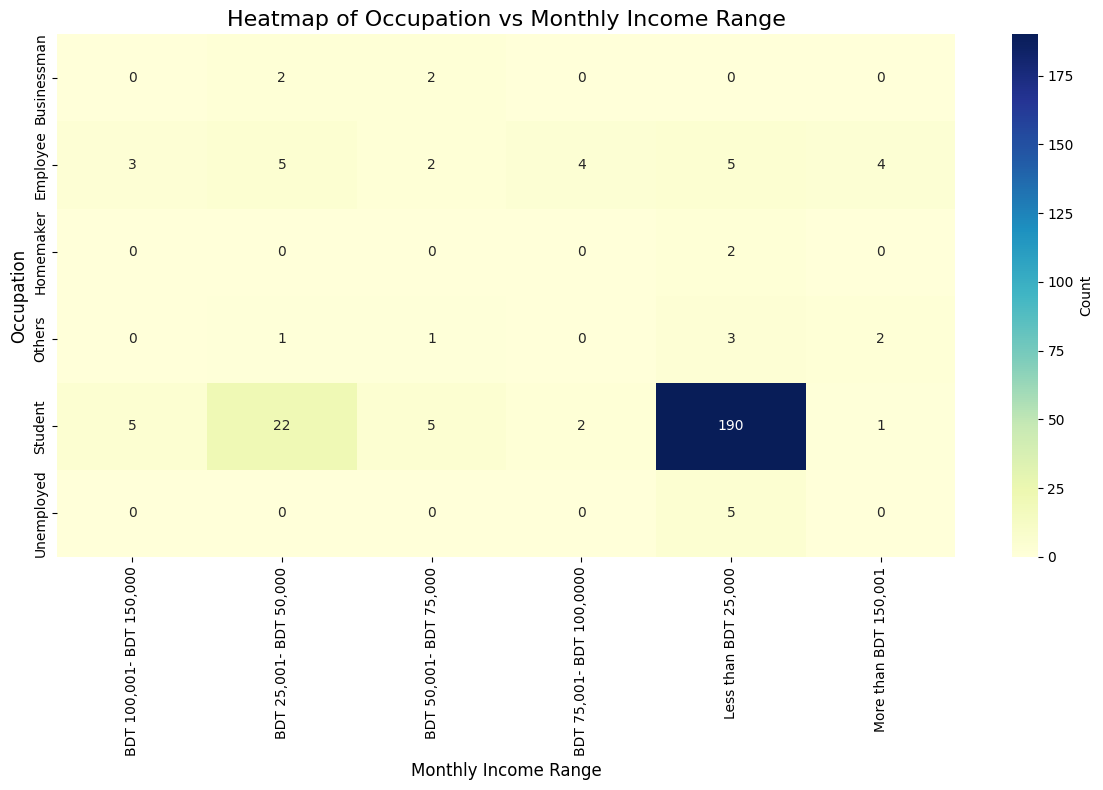

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Load the dataset using the appropriate engine
df = pd.read_excel('partially_cleaned_dataset.xlsx', engine='openpyxl')

# Print the columns to verify their names
print("Available columns in the DataFrame:")
print(df.columns)

# Strip whitespace from column names (if any)
df.columns = df.columns.str.strip()

# Verify again after stripping whitespace
print("Stripped column names:")
print(df.columns)

# Create a contingency table using the correct column names
contingency_table = pd.crosstab(df['Occupation:'], df['Monthly income range:'])

# Calculate Chi-square statistic, p-value, and Cramer's V
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Cramer's V calculation
n = contingency_table.sum().sum()  # Total number of observations
phi2 = chi2_stat / n
r, k = contingency_table.shape  # r: number of rows, k: number of columns
cramers_v = (phi2 / min(k-1, r-1))**0.5

# Print the results
print(f"Chi-square statistic: {chi2_stat}")
print(f"p-value: {p_val}")
print(f"Cramer's V: {cramers_v}")

# Create a heatmap of the contingency table
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d', cbar_kws={'label': 'Count'})
plt.title('Heatmap of Occupation vs Monthly Income Range', fontsize=16)
plt.xlabel('Monthly Income Range', fontsize=12)
plt.ylabel('Occupation', fontsize=12)
plt.tight_layout()

# Show the plot inline in the Kaggle notebook
plt.show()

# Explanation based on the statistical results
explanation = f"""
<div style="font-family: Tahoma; font-size: 18px; color: black;">
    <h2>Statistical Analysis Explanation</h2>
    <p>The Chi-square test was performed to assess the relationship between occupation and monthly income range. The results are as follows:</p>
    <ul>
        <li><strong>Chi-square statistic:</strong> {chi2_stat:.2f}</li>
        <li><strong>p-value:</strong> {p_val:.2e}</li>
        <li><strong>Cramer's V:</strong> {cramers_v:.2f}</li>
    </ul>
    <p>The p-value indicates a statistically significant relationship between the two categorical variables, as it is far below the conventional alpha level of 0.05.</p>
    <p>Cramer's V is 0.32, which suggests a moderate association between occupation and monthly income range. This indicates that as one variable changes, there is a tendency for the other variable to change as well, though the association is not extremely strong.</p>
</div>
"""

# Display the explanation
from IPython.display import display, HTML
display(HTML(explanation))


# To be Continued... ... ...

# https://www.kaggle.com/msahmed
**Upvote if you like my analytics **